# Building a Generative Adversarial Network (GAN)

In [1]:
import tensorflow as tf
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from gan import GenAdvNetwork
import os
from matplotlib import pyplot as plt
from utils import *

2023-05-04 16:39:20.846931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading data

In [2]:
"""
Loading data
Note than we can only specify absolute location of the raw data
"""
molRep2D, energies = loadData(12, "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz")

input data size: (10000, 78)
output data size: (10000,)


In [3]:
# """
# Loading data
# Note than we can only specify absolute location of the raw data
# """
newTrajMolRep1, newTrajEnergies1 = loadData(max_size=12, 
                                filename="/home/panthibivek/thesis/GAN_pkg/data/MD/trajectory1.xyz", 
                                energyFilename="/home/panthibivek/thesis/GAN_pkg/data/MD/traj1_energies.txt",
                                xyzdirname="/data/Traj1/AllMolecules",
                                coulombMtxFilename="/data/Traj1/lower_coulomb_mtx_array.txt")

input data size: (10001, 78)
output data size: (10001,)


In [4]:
# """
# Loading data
# Note than we can only specify absolute location of the raw data
# """
# newTrajMolRep2, newTrajEnergies2 = loadData(max_size=12, 
#                                 filename="/home/panthibivek/thesis/GAN_pkg/data/MD/trajectory2.xyz", 
#                                 energyFilename="/home/panthibivek/thesis/GAN_pkg/data/MD/traj2_energies.txt",
#                                 xyzdirname="/data/Traj2/AllMolecules",
#                                 coulombMtxFilename="/data/Traj2/lower_coulomb_mtx_array.txt")

In [5]:
allMolRep = np.concatenate([molRep2D[:9000], newTrajMolRep1[:9000]], axis=0)
allEnergies = np.concatenate([energies[:9000], newTrajEnergies1[:9000]], axis=0)
#randomize the data and split it into training and test set
allMolRepSuffled, allEnergiesSuffled = unison_shuffle(allMolRep, allEnergies)
X_train, y_train = allMolRepSuffled, allEnergiesSuffled
# X_train, X_test, y_train, y_test = train_test_split(allMolRep,allEnergies,
#                                    random_state=104, 
#                                    test_size=0.1, 
#                                    shuffle=True)
# print(allMolRep.shape)
print("Training data size:", X_train.shape)
# print("Test data size:", X_test.shape)

Training data size: (18000, 78)


### Hyperparametes

In [6]:
latent_dim_ = 32
epochs_ = 50
batch_size_ = 16
y_train = np.reshape(y_train, (-1, 1))
X_train = np.array(X_train)
X_train = X_train.astype(float)
X_train = np.reshape(X_train, (-1, 78, 1))
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size_)

2023-05-04 16:39:29.294754: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-04 16:39:29.294834: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-04 16:39:29.345625: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-04 16:39:29.345692: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-04 16:39:29.345734: I tensorflow/compiler/xla/stream_executo

### Compiling the Model and Fitting the Model <br>
Note: The definition of the class GenAdvNetwork is in gan.py 

In [7]:
GAN_model = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GAN_model.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    disc_loss=tf.keras.losses.BinaryCrossentropy(),
    gen_loss=tf.keras.losses.MAE
)
history = GAN_model.fit(dataset, epochs=epochs_)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                429       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                           

2023-05-04 16:39:29.392966: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.393742: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.403362: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.403961: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.407558: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.408240: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.409091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.409592: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.410071: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29

Epoch 1/50


2023-05-04 16:39:29.616377: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.618583: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.621258: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.622238: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.622925: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.623450: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.623859: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.624323: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29.624716: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 16:39:29

1125/1125 [==============================] - 61s 54ms/step - g_loss: 5.1750 - d_loss: 1.2714
Epoch 2/50
1125/1125 [==============================] - 60s 53ms/step - g_loss: 2.3313 - d_loss: 2.5810
Epoch 3/50
1125/1125 [==============================] - 62s 55ms/step - g_loss: 1.2795 - d_loss: 3.0851
Epoch 4/50
1125/1125 [==============================] - 61s 54ms/step - g_loss: 0.5599 - d_loss: 3.3531
Epoch 5/50
1125/1125 [==============================] - 61s 54ms/step - g_loss: 0.3590 - d_loss: 3.3897
Epoch 6/50
1125/1125 [==============================] - 60s 53ms/step - g_loss: 0.3097 - d_loss: 3.4040
Epoch 7/50
1125/1125 [==============================] - 60s 53ms/step - g_loss: 0.2611 - d_loss: 3.4138
Epoch 8/50
1125/1125 [==============================] - 59s 53ms/step - g_loss: 0.2481 - d_loss: 3.4188
Epoch 9/50
1125/1125 [==============================] - 60s 53ms/step - g_loss: 0.2261 - d_loss: 3.4216
Epoch 10/50
1125/1125 [==============================] - 60s 53ms/step - g_

### Saving the Model

In [8]:
train_dir = os.path.dirname(os.path.abspath("__file__")) + "/runs/train/exp2/weights/"
GAN_model.save_weights(train_dir, save_format='tf')

2023-05-04 17:28:53.426750: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.432255: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.432791: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.433308: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.433780: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.434177: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.435069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.435441: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53.436431: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-04 17:28:53

### Plotting the Generator and Discriminator Loss

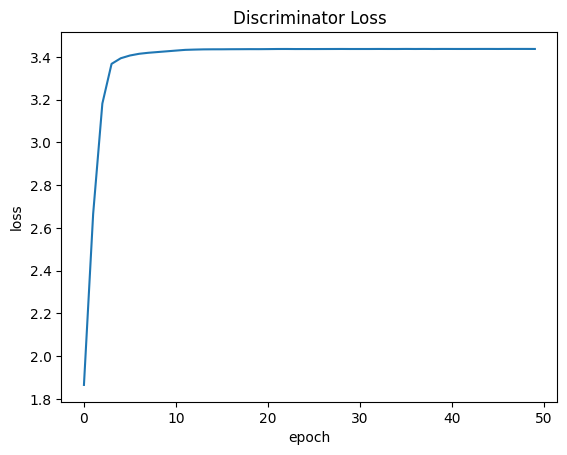

In [16]:
plt.plot(history.history['d_loss'])
# plt.yscale('log')
plt.title('Discriminator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'disLoss.png', dpi = 300)

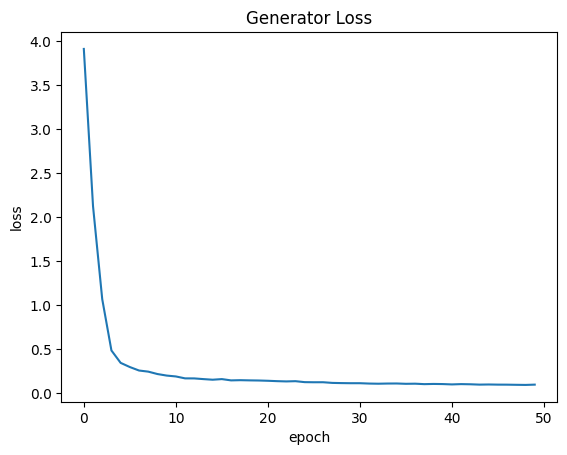

In [15]:
plt.plot(history.history['g_loss'])
# plt.yscale('log')
plt.title('Generator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig2 = plt.gcf()
plt.show()
fig2.savefig(train_dir + 'genLoss.png', dpi = 300)

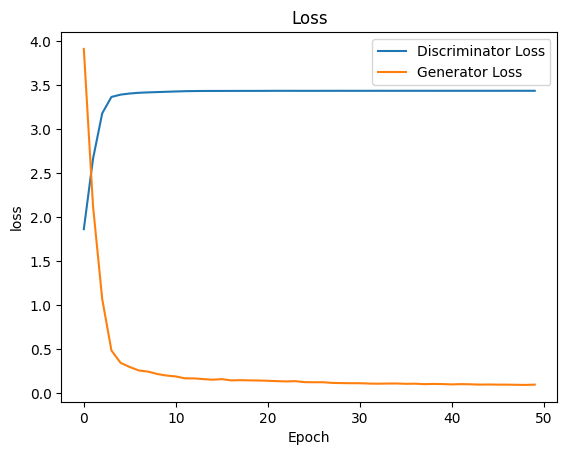

In [14]:
plt.plot(history.history['d_loss'], label='Discriminator Loss')
plt.plot(history.history['g_loss'], label='Generator Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
fig3 = plt.gcf()
plt.show()
fig3.savefig(train_dir + 'GAN_loss.png', dpi = 300)